In [1]:
import sys
sys.path.append('../')
from dataset import *
from data_aug import *
import tensorflow as tf
from comparison_model import *
from utils import *
from ranking_model import *

import random
import numpy as np
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Dense, Flatten, BatchNormalization, Dropout, Subtract, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB0

In [2]:
image1_array, image2_array, labels = load_data("../data/question_1/Streetview_dataaug/")
batch_size = 64

train_generator, valid_generator, test_generator, train_size, valid_size = prepare_dataset_generators(image1_array, image2_array, labels, batch_size, "ranking")

train_steps_per_epoch = train_size // batch_size
valid_steps_per_epoch = valid_size // batch_size

{'dense_units': 256, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'optimizer': 'sgd', 'activation': 'relu', 'learning_rate_decay': 0.001}
Epoch 1/50
171/171 [==============================] - 182s 966ms/step - loss: 0.8886 - accuracy: 0.6033 - val_loss: 0.7519 - val_accuracy: 0.4679
Epoch 2/50
171/171 [==============================] - 85s 490ms/step - loss: 0.7700 - accuracy: 0.6644 - val_loss: 0.6604 - val_accuracy: 0.6656
Epoch 3/50
171/171 [==============================] - 84s 490ms/step - loss: 0.7239 - accuracy: 0.6884 - val_loss: 0.5955 - val_accuracy: 0.7283
Epoch 4/50
171/171 [==============================] - 84s 489ms/step - loss: 0.6968 - accuracy: 0.6973 - val_loss: 0.5819 - val_accuracy: 0.7253
Epoch 5/50
171/171 [==============================] - 83s 488ms/step - loss: 0.6807 - accuracy: 0.7052 - val_loss: 0.5811 - val_accuracy: 0.7174
Epoch 6/50
171/171 [==============================] - 83s 488ms/step - loss: 0.6678 - accuracy: 0.7097 - val_loss: 0.5908 - val_accurac

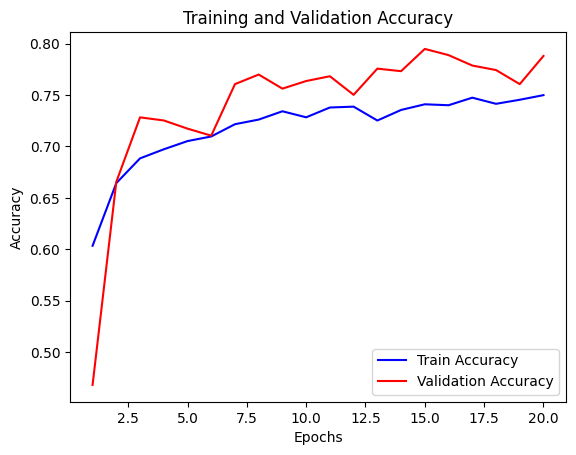

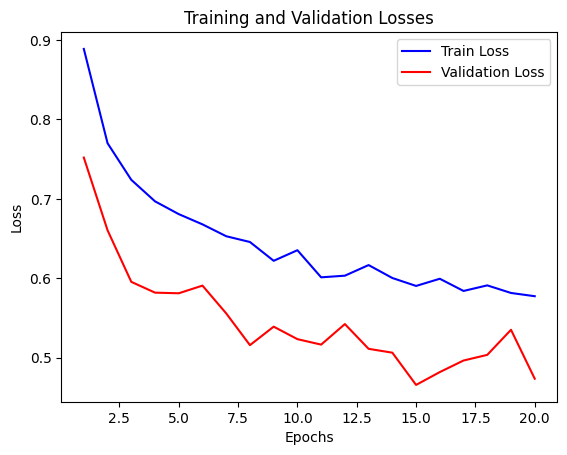

{'dense_units': 64, 'dropout_rate': 0.2, 'learning_rate': 1e-06, 'optimizer': 'sgd', 'activation': 'relu', 'learning_rate_decay': 0.001}
Epoch 1/50
171/171 [==============================] - 89s 492ms/step - loss: 1.2178 - accuracy: 0.4899 - val_loss: 0.6880 - val_accuracy: 0.5614
Epoch 2/50
171/171 [==============================] - 83s 486ms/step - loss: 1.2047 - accuracy: 0.5065 - val_loss: 0.9794 - val_accuracy: 0.4718
Epoch 3/50
171/171 [==============================] - 83s 488ms/step - loss: 1.1472 - accuracy: 0.5140 - val_loss: 0.9930 - val_accuracy: 0.4910
Epoch 4/50
171/171 [==============================] - 83s 488ms/step - loss: 1.1738 - accuracy: 0.5090 - val_loss: 0.9779 - val_accuracy: 0.4978
Epoch 5/50
171/171 [==============================] - 83s 487ms/step - loss: 1.1340 - accuracy: 0.5212 - val_loss: 0.9746 - val_accuracy: 0.5014
Epoch 6/50
57/57 [==============================] - 9s 161ms/step - loss: 0.9263 - accuracy: 0.5197
{'dense_units': 64, 'dropout_rate': 0.

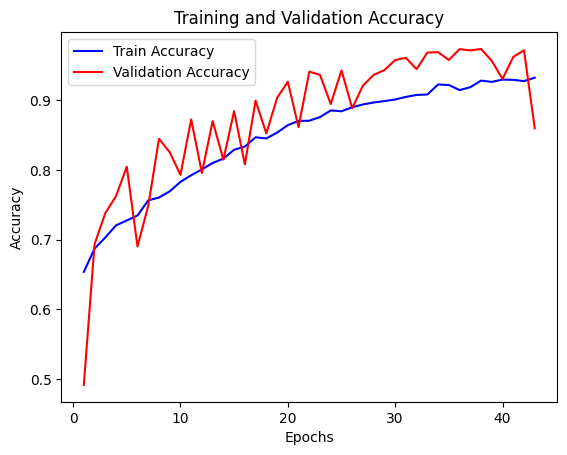

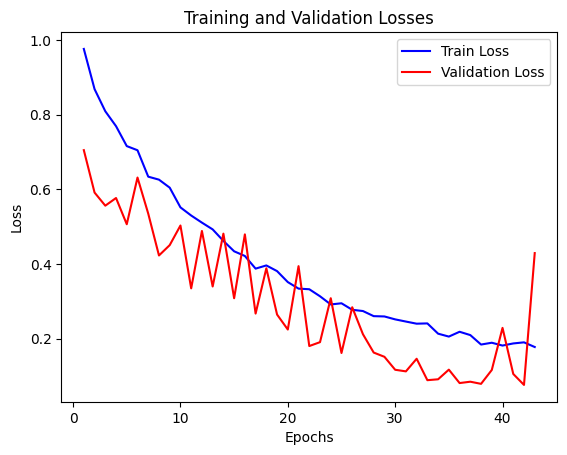

{'dense_units': 32, 'dropout_rate': 0.6, 'learning_rate': 1e-06, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate_decay': 1e-05}
Epoch 1/50
171/171 [==============================] - 90s 492ms/step - loss: 1.3723 - accuracy: 0.5197 - val_loss: 0.7430 - val_accuracy: 0.4666
Epoch 2/50
171/171 [==============================] - 84s 489ms/step - loss: 1.3168 - accuracy: 0.5313 - val_loss: 0.7712 - val_accuracy: 0.5622
Epoch 3/50
171/171 [==============================] - 83s 488ms/step - loss: 1.2496 - accuracy: 0.5492 - val_loss: 0.6576 - val_accuracy: 0.6573
Epoch 4/50
171/171 [==============================] - 84s 489ms/step - loss: 1.1882 - accuracy: 0.5619 - val_loss: 0.6318 - val_accuracy: 0.6782
Epoch 5/50
171/171 [==============================] - 83s 488ms/step - loss: 1.1812 - accuracy: 0.5748 - val_loss: 0.6067 - val_accuracy: 0.7009
Epoch 6/50
171/171 [==============================] - 83s 487ms/step - loss: 1.1286 - accuracy: 0.5912 - val_loss: 0.5959 - val_accuracy:

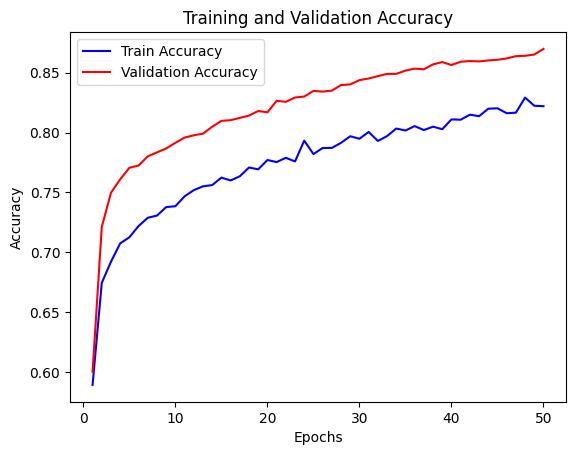

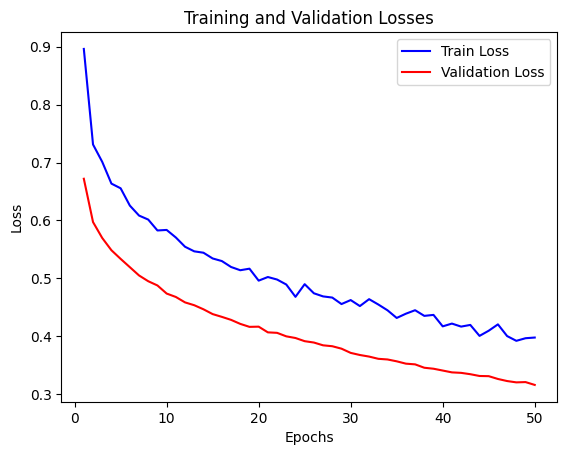

{'dense_units': 256, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'optimizer': 'rmsprop', 'activation': 'sigmoid', 'learning_rate_decay': 0.0001}
Epoch 1/50
171/171 [==============================] - 96s 507ms/step - loss: 0.6130 - accuracy: 0.7439 - val_loss: 0.6629 - val_accuracy: 0.6349
Epoch 2/50
171/171 [==============================] - 86s 501ms/step - loss: 0.4290 - accuracy: 0.8100 - val_loss: 0.6281 - val_accuracy: 0.6519
Epoch 3/50
171/171 [==============================] - 86s 501ms/step - loss: 0.3338 - accuracy: 0.8620 - val_loss: 0.4788 - val_accuracy: 0.7812
Epoch 4/50
171/171 [==============================] - 86s 501ms/step - loss: 0.2686 - accuracy: 0.8922 - val_loss: 0.6415 - val_accuracy: 0.6464
Epoch 5/50
171/171 [==============================] - 86s 501ms/step - loss: 0.1962 - accuracy: 0.9243 - val_loss: 0.3526 - val_accuracy: 0.8558
Epoch 6/50
171/171 [==============================] - 86s 501ms/step - loss: 0.1595 - accuracy: 0.9380 - val_loss: 0.4994 - val_

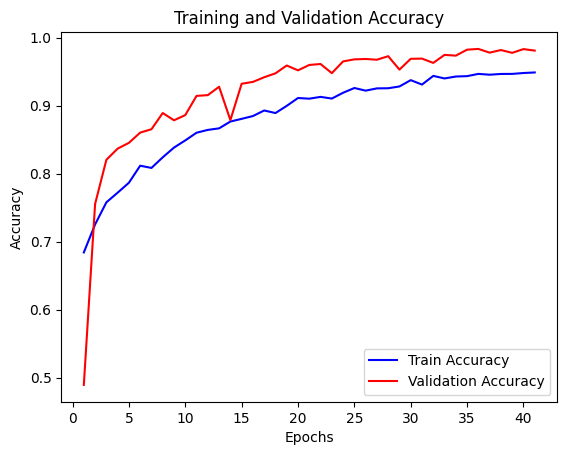

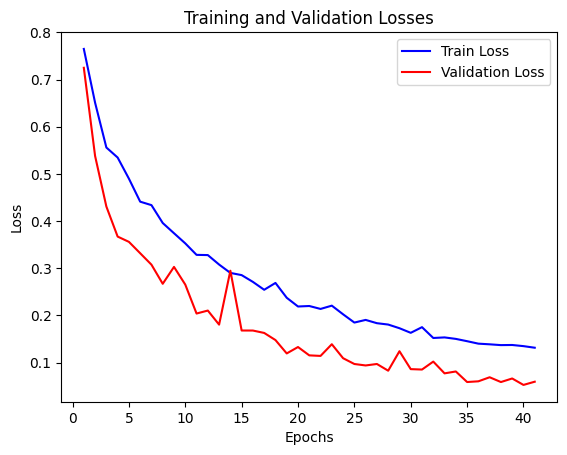

{'dense_units': 128, 'dropout_rate': 0.2, 'learning_rate': 1e-06, 'optimizer': 'adam', 'activation': 'relu', 'learning_rate_decay': 0.001}
Epoch 1/50
171/171 [==============================] - 95s 494ms/step - loss: 0.9399 - accuracy: 0.5510 - val_loss: 0.7037 - val_accuracy: 0.5343
Epoch 2/50
171/171 [==============================] - 84s 489ms/step - loss: 0.8211 - accuracy: 0.6113 - val_loss: 0.6977 - val_accuracy: 0.6584
Epoch 3/50
171/171 [==============================] - 84s 489ms/step - loss: 0.7637 - accuracy: 0.6484 - val_loss: 0.6206 - val_accuracy: 0.7034
Epoch 4/50
171/171 [==============================] - 84s 490ms/step - loss: 0.7310 - accuracy: 0.6638 - val_loss: 0.6003 - val_accuracy: 0.7149
Epoch 5/50
171/171 [==============================] - 84s 490ms/step - loss: 0.7199 - accuracy: 0.6734 - val_loss: 0.5894 - val_accuracy: 0.7215
Epoch 6/50
171/171 [==============================] - 84s 490ms/step - loss: 0.6874 - accuracy: 0.6826 - val_loss: 0.5802 - val_accuracy

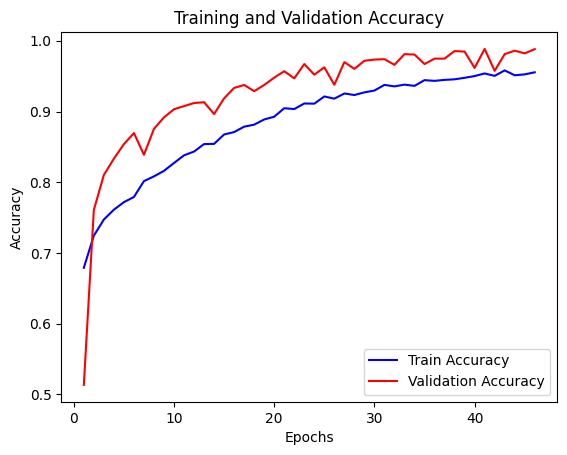

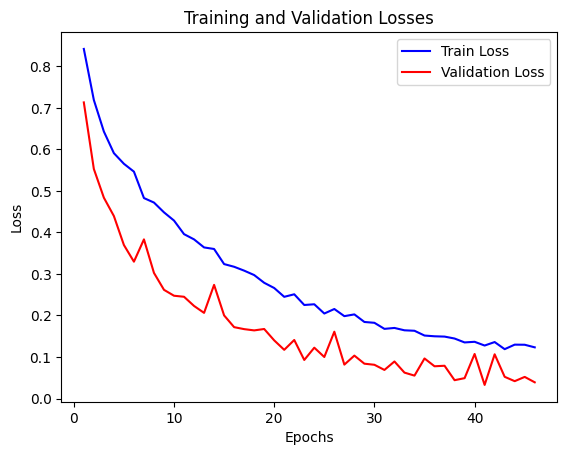

{'dense_units': 32, 'dropout_rate': 0.4, 'learning_rate': 1e-05, 'optimizer': 'adam', 'activation': 'tanh', 'learning_rate_decay': 0.0001}
Epoch 1/50
171/171 [==============================] - 106s 494ms/step - loss: 0.9198 - accuracy: 0.6319 - val_loss: 0.7111 - val_accuracy: 0.5156
Epoch 2/50
171/171 [==============================] - 84s 491ms/step - loss: 0.7791 - accuracy: 0.6907 - val_loss: 0.5661 - val_accuracy: 0.7500
Epoch 3/50
171/171 [==============================] - 83s 488ms/step - loss: 0.7356 - accuracy: 0.7041 - val_loss: 0.5135 - val_accuracy: 0.7777
Epoch 4/50
171/171 [==============================] - 84s 489ms/step - loss: 0.7146 - accuracy: 0.7110 - val_loss: 0.4984 - val_accuracy: 0.7862
Epoch 5/50
171/171 [==============================] - 84s 492ms/step - loss: 0.6845 - accuracy: 0.7250 - val_loss: 0.4598 - val_accuracy: 0.8026
Epoch 6/50
171/171 [==============================] - 84s 493ms/step - loss: 0.6643 - accuracy: 0.7295 - val_loss: 0.4596 - val_accurac

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted:  MemoryError: Unable to allocate 36.8 MiB for an array with shape (64, 224, 224, 3) and data type float32
Traceback (most recent call last):

  File "c:\anaconda\envs\transformers2\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "c:\anaconda\envs\transformers2\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "c:\anaconda\envs\transformers2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\anaconda\envs\transformers2\lib\site-packages\keras\engine\data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\habdu061\Documents\Git\UrbanPerception\Notebook\..\dataset.py", line 162, in data_generator
    batch_images2 = images2[batch_indices]

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 36.8 MiB for an array with shape (64, 224, 224, 3) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

  (1) Resource exhausted:  MemoryError: Unable to allocate 36.8 MiB for an array with shape (64, 224, 224, 3) and data type float32
Traceback (most recent call last):

  File "c:\anaconda\envs\transformers2\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "c:\anaconda\envs\transformers2\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "c:\anaconda\envs\transformers2\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "c:\anaconda\envs\transformers2\lib\site-packages\keras\engine\data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "c:\Users\habdu061\Documents\Git\UrbanPerception\Notebook\..\dataset.py", line 162, in data_generator
    batch_images2 = images2[batch_indices]

numpy.core._exceptions._ArrayMemoryError: Unable to allocate 36.8 MiB for an array with shape (64, 224, 224, 3) and data type float32


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[IteratorGetNext/_2]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

0 successful operations.
0 derived errors ignored. [Op:__inference_test_function_1493780]

Function call stack:
test_function -> test_function


In [3]:
# Define hyperparameter search space with wider ranges
hyperparameters = {
    'dense_units': [32, 64, 128, 256],
    'dropout_rate': [0.2, 0.4, 0.6],
    'learning_rate': [0.0001, 0.00001, 0.000001],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation': ['relu', 'sigmoid', 'tanh'],
    'learning_rate_decay': [0.001, 0.0001, 0.00001]
}

def create_ranking_network(img_size, dense_units, dropout_rate, activation):
    """
    Create ranking network which gives a score to an image.

    :param img_size: size of input images during training
    :type img_size: tuple(int)
    :param dense_units: number of units in the dense layer
    :type dense_units: int
    :param dropout_rate: dropout rate
    :type dropout_rate: float
    :return: ranking network model
    :rtype: keras.Model
    """
    # Create feature extractor from VGG19
    feature_extractor = EfficientNetB0(include_top=False, weights='imagenet')
    for layer in feature_extractor.layers[:-200]:
        layer.trainable = False


    # Add dense layers on top of the feature extractor
    inp = Input(shape=(img_size, img_size, 3), name='input_image')
    base = feature_extractor(inp)
    base = Flatten(name='Flatten')(base)

    # Block 1
    base = Dense(dense_units, activation=activation, name='Dense_1')(base)
    base = BatchNormalization(name='BN1')(base)
    base = Dropout(dropout_rate, name='Drop_1')(base)

    # Block 2
    base = Dense(dense_units, activation=activation, name='Dense_2')(base)
    base = BatchNormalization(name='BN2')(base)
    base = Dropout(dropout_rate, name='Drop_2')(base)

    # Final dense
    base = Dense(1, name="Dense_Output")(base)
    base_network = Model(inp, base, name='Scoring_model')
    return base_network


def create_meta_network(img_size, dense_units, dropout_rate, learning_rate, optimizer, activation, learning_rate_decay, weights=None):
    """
    Create meta network which is used to teach the ranking network.

    :param img_size: dimension of input images during training.
    :type img_size: tuple(int)
    :param dense_units: number of units in the dense layer
    :type dense_units: int
    :param dropout_rate: dropout rate
    :type dropout_rate: float
    :param learning_rate: learning rate for the optimizer
    :type learning_rate: float
    :param optimizer: optimizer for model training
    :type optimizer: str
    :param activation: activation function for model layers
    :type activation: str
    :param learning_rate_decay: learning rate decay rate
    :type learning_rate_decay: float
    :param weights: path to the weights use for initialization
    :type weights: str
    :return: meta network model
    :rtype: keras.Model
    """
    # Create the two input branches
    input_left = Input(shape=(img_size, img_size, 3), name='left_input')
    input_right = Input(shape=(img_size, img_size, 3), name='right_input')
    base_network = create_ranking_network(img_size, dense_units, dropout_rate, activation)
    left_score = base_network(input_left)
    right_score = base_network(input_right)

    # Subtract scores
    diff = Subtract()([left_score, right_score])

    # Pass difference through sigmoid function.
    prob = Activation("sigmoid", name="Activation_sigmoid")(diff)
    model = Model(inputs=[input_left, input_right], outputs=prob, name="Meta_Model")

    if weights:
        print('Loading weights ...')
        model.load_weights(weights)

    if optimizer == "adam":
        optimizer = Adam(learning_rate=learning_rate, decay=learning_rate_decay)
    elif optimizer == "sgd":
        optimizer = SGD(learning_rate=learning_rate, decay=learning_rate_decay)
    elif optimizer == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate, decay=learning_rate_decay)
    else:
        raise ValueError("Unsupported optimizer: " + optimizer)

    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=['accuracy'])

    return model

# Initialize best hyperparameters and best validation accuracy
best_hyperparameters = None
best_test_accuracy = 0.0

# Define the number of random combinations to try
num_random_combinations = 70

# Perform random search
for _ in range(num_random_combinations):
    # Generate random combination of hyperparameters
    combination = {
        param: random.choice(values)
        for param, values in hyperparameters.items()
    }
    print(combination)
    # Create and train the model with the current hyperparameters
    model = create_meta_network(224, **combination)
    
    early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)

    # Train the model
    history = model.fit(train_generator,
          steps_per_epoch=train_steps_per_epoch,
          epochs=50,
          validation_data=valid_generator,
          validation_steps=valid_steps_per_epoch,
          callbacks=[early_stopping])
    
    # Evaluate the model on the test set
    _, test_accuracy = model.evaluate(test_generator, steps=valid_steps_per_epoch)
    
    # Check if the current model has the best test accuracy so far
    if test_accuracy > best_test_accuracy:
        best_hyperparameters = combination
        best_test_accuracy = test_accuracy
        # Save the weights of the best model
        model.save_weights('best_model_weights.h5')
        plot_accuracy(history)
        plot_loss(history)

# Print the best hyperparameters and best test accuracy
print('Best Hyperparameters:', best_hyperparameters)
print('Best Test Accuracy:', best_test_accuracy)


